In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

In [32]:
def load_data():
    data = pd.read_csv('HASIL_LABELING_PANDEMI(FINAL).csv')
    return data
df = load_data()
df

,Tweet_translated,Label
0,Woy ini sinyal lu bapuk banget anjir @IndiHome,1
1,Parah sinyal wifi indihome gak jelas banget ma...,0
2,indihome kenapa ini? beberapa hari sinyal gw j...,0
3,@IndiHome sinyal jelek terus,0
4,@IndiHome sinyal WiFi nya koq gangguan ga ada ...,0
...,...,...
4161,"@MPrasetyoN Kak Prasetyo, maaf ya bikin ga nya...",0
4162,sinyal lu jelek bgt si anj @IndiHome,0
4163,"@meidinanm Hallo Meidina, maaf ya jadi bikin t...",0
4164,"@firdaus72332200 Selamat siang Kak Firdaus, mo...",0


In [33]:
#x = atribut yg mempengaruhi label
#y = label itu sendiri

x = df.drop(['Label'],axis=1)
y = df['Label']

In [34]:
#sebelum balancing menggunakan SMOTE

print(x.shape)
print(y.shape)

(4166, 1)
(4166,)


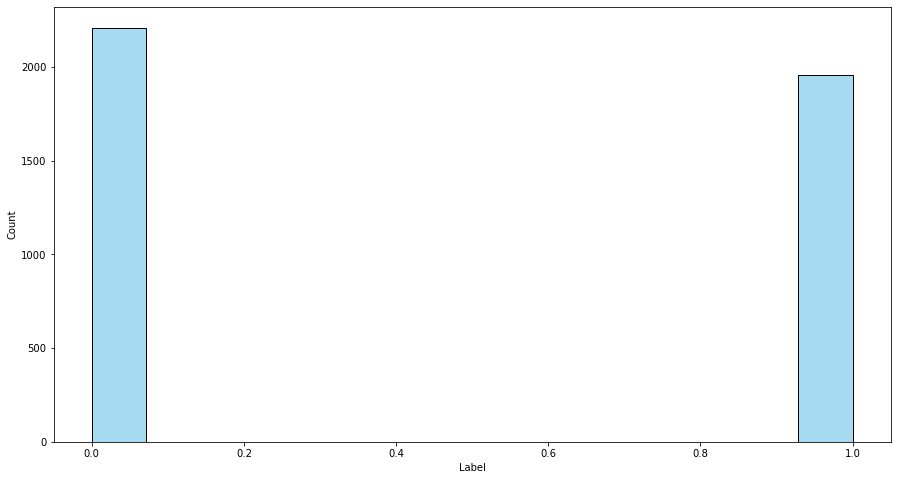

In [35]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.histplot(data=df,x='Label',ax=axes,color='skyblue')
plt.show()

In [36]:
df = df.groupby("Label").sample(n=2500, random_state=42, replace=True)
df['Label'].value_counts()
df = df.sample(frac=1)
df.head()

,Tweet_translated,Label
349,"@ficofachriza_ Apapun itu, selalu mengandalkan...",1
3768,"@ramadhan_dhicky Malam, Kak Ramadhan. Maaf jad...",1
3357,"sinyal indihome berasa penting banget ya, ilan...",1
600,kayaknya indihome tuh gamau aku presentasi deh...,0
1920,@anvrvl @habibaahnurull @simPATI @IndiHome Hai...,0


5000


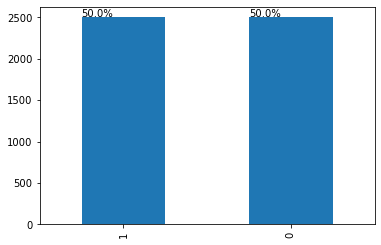

In [37]:
s = pd.value_counts(df['Label'])
ax = s.plot.bar()
n = len(df.index)
print(n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [38]:
df

,Tweet_translated,Label
349,"@ficofachriza_ Apapun itu, selalu mengandalkan...",1
3768,"@ramadhan_dhicky Malam, Kak Ramadhan. Maaf jad...",1
3357,"sinyal indihome berasa penting banget ya, ilan...",1
600,kayaknya indihome tuh gamau aku presentasi deh...,0
1920,@anvrvl @habibaahnurull @simPATI @IndiHome Hai...,0
...,...,...
2594,"@selenophileaj @lveyss Sore Kak Seleno, maaf j...",1
1439,"@fiqooh @zz04595401 Hai Sobat, maaf jadi gak n...",0
1740,"@ahmadfirdaus1st Malam Kak Firdaus, Raden bant...",1
698,indosat indihome\n ðŸ¤\n ...,0


In [39]:
df.to_csv('DATA_LABELING_INDIHOME_PANDEMI_BALANCING.csv',encoding='utf8', index=False)